In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import (Dataset, DataLoader, TensorDataset)
from torchvision.datasets import ImageFolder
from torchvision import transforms
import tqdm

In [2]:
image_dir = 'bicycle'
train_dir = image_dir + '/train'
test_dir = image_dir + '/test'

In [3]:
#Dataset 작성
trainset = ImageFolder(train_dir,
                        transform = transforms.Compose([
                            transforms.RandomCrop(224),
                            transforms.ToTensor()
                        ]))
testset = ImageFolder(test_dir,
                     transform = transforms.Compose([
                         transforms.CenterCrop(224),
                         transforms.ToTensor()
                     ]))
trainloader = DataLoader(trainset, batch_size=4,
                        shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=4,
                       shuffle=False, num_workers=2)
classes = trainset.classes

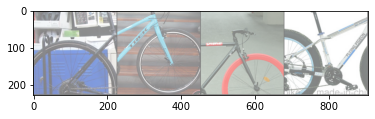

hybrid hybrid hybrid   mtb


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
#합성곱 신경망 정의
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*53*53, 1024)
        self.fc2 = nn.Linear(1024, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*53*53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [5]:
#교차 엔트로피 손실과 모멘텀 값을 갖는 SGD 사용

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        #변화도(Gradient) 매개변수를 0으로 만듦
        optimizer.zero_grad()
        
        #순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini batches
            print('[%d %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

Finished Training


In [8]:
# 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

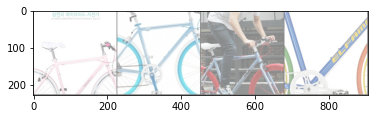

GroundTruth:  hybrid hybrid hybrid hybrid


In [9]:
#시험용 데이터로 신경망 검사하기
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
#GroundTruth:진짜 정답
print('GroundTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
net = Net()
#예제들을 신경망이 어떻게 예측하나 확인
outputs = net(images)
#가장 높은 값 -> 해당 분류에 가깝다고 판단
_,predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    mtb   mtb   mtb   mtb


In [11]:
#전체 데이터셋에서의 동작
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on test images: %d %%' % (100 * correct / total))

Accuracy of the network on test images: 33 %


In [12]:
#카테고리 별 분류 정확도 보기
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(3):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

IndexError: index 2 is out of bounds for dimension 0 with size 2